# Pandas Data Analyst Agent

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)


## Multi-Agents for Pandas Data Analysis

**The Pandas Data Analysis agent** we build in this tutorial is a multi-agent that can perform Pandas data wrangling and analysis on a data set and optionally visualize the results. The agent combines 2 subagents:

1. **Data Wrangling Agent:** Handles data wrangling, transformations, and analysis using Pandas.
2. **Data Visualization Agent:** Visualize the results if a user requests a plot.

This tutorial will show you how to perform Data Analysis using Pandas and data visualizations, **all in one agent.** 

### Data Set

The `churn_data.csv` data set contains customer data for a telecommunications company. 

# Table of Contents

1. [Pandas Data Analyst Agent](#pandas-data-analyst-agent)
2. [Multi-Agents for Pandas Data Analysis](#multi-agents-for-pandas-data-analysis)
3. [Build Pandas Data Analysis Agents](#build-pandas-data-analysis-agents)
    1. [Load Libraries](#load-libraries)
    2. [Setup AI and Logging](#setup-ai-and-logging)
    3. [Read a Data Set](#read-a-data-set)
    4. [Create The Agent](#create-the-agent)
    5. [Viewing Subagents With xray](#viewing-subagents-with-xray)
    6. [Run the Agent](#run-the-agent)
        1. [Example 1: What are the first 5 rows of the data?](#example-1-what-are-the-first-5-rows-of-the-data)
        2. [Example 2: Plot a boxplot with violin between monthly payment and churn](#example-2-plot-a-boxplot-with-violin-between-monthly-payment-and-churn)
    7. [Response](#response)
    8. [Pandas Data Frame](#pandas-data-frame)
    9. [Pandas Code](#pandas-code)
    10. [Workflow Summary](#workflow-summary)
4. [Want To Become A Full-Stack Generative AI Data Scientist?](#want-to-become-a-full-stack-generative-ai-data-scientist)

### Load Libraries

In [1]:
# * Libraries

from langchain_openai import ChatOpenAI
import pandas as pd
import os
import yaml
from pprint import pprint

from ai_data_science_team import PandasDataAnalyst, DataWranglingAgent, DataVisualizationAgent

### Setup AI and Logging

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the AI Data Science Teams processing of files. 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [2]:
# * Setup

MODEL    = "gpt-4o-mini"
LOG      = False
LOG_PATH = os.path.join(os.getcwd(), "logs/")

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model = MODEL)

llm


ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7f9760038820>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7f97600390c0>, root_client=<openai.OpenAI object at 0x7f9760039810>, root_async_client=<openai.AsyncOpenAI object at 0x7f9760038130>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

### Read a Data Set

Next, let's read a dataset. The `churn_data.csv` data set contains customer data for a telecommunications company.

In [3]:
# * Data

df = pd.read_csv("data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Create The Agent

Run this code to create the agent with `PandasDataAnalyst()`. This will create a multi-agent that can perform Pandas Data Analysis on a dataset and optionally visualize the results. This agent combines 2 subagents:

#### DataWranglingAgent

The `DataWranglingAgent` is a subagent that handles data wrangling, transformations, and analysis using Pandas.

#### DataVisualizationAgent

The `DataVisualizationAgent` is a subagent that visualizes the results if a user requests a plot.

Run this code to create the multi-agent:

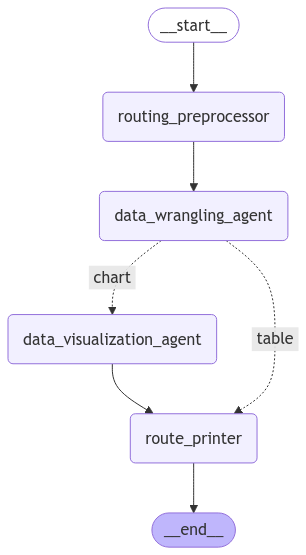

In [4]:
pandas_data_analyst = PandasDataAnalyst(
    model = llm,
    data_wrangling_agent = DataWranglingAgent(
        model = llm,
        log = LOG,
        log_path = LOG_PATH,
        bypass_recommended_steps=True,
    ),
    data_visualization_agent = DataVisualizationAgent(
        model = llm,
        n_samples = 10,
        log = LOG,
        log_path = LOG_PATH,
    ),
)

pandas_data_analyst

### Viewing Subagents With xray

Keep in mind that this agent is actually a multi-agent that combines 2 subagents. We can view the subagents by running the following code:

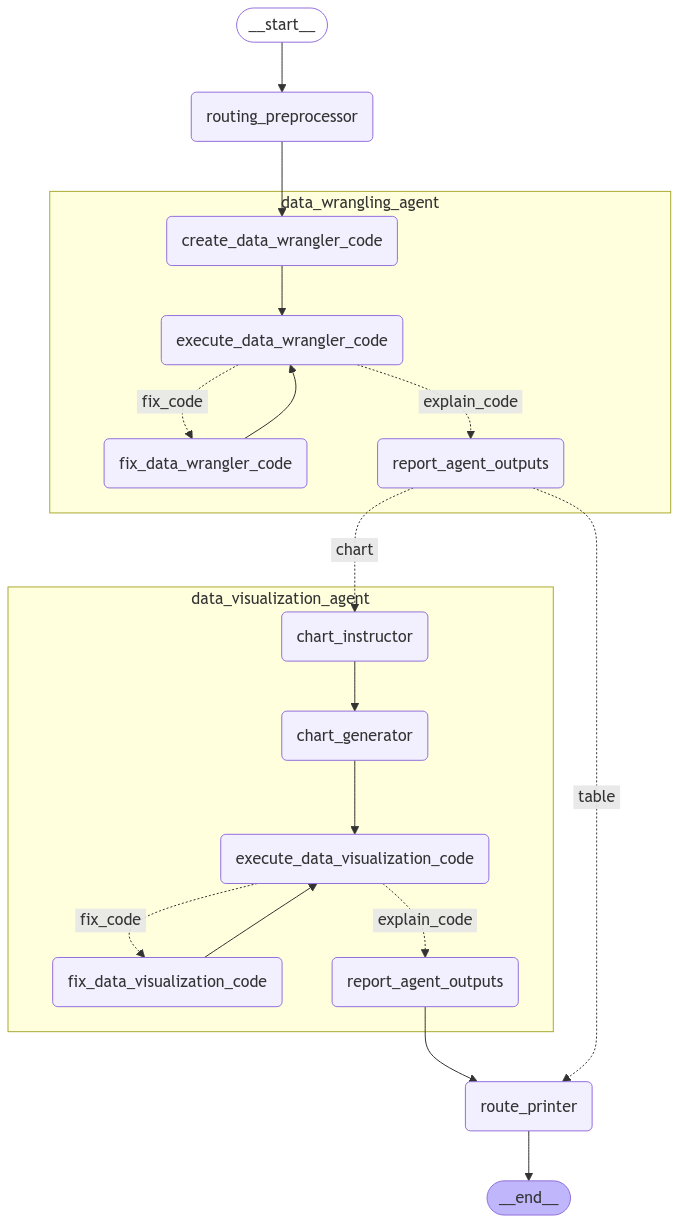

In [6]:
pandas_data_analyst.show(xray=1)

### Run the Agent

The main inputs to the SQL DB Agent are:

- **user_instructions**: What actions you'd like to take on the data. 
- **data_raw**: The data set to perform the actions on.

Let's start with a simple question that a user might want to know about the database:

## Example 1: What are the first 5 rows of the data?

In [7]:

pandas_data_analyst.invoke_agent(
    user_instructions = "What are the first 5 rows of the data?",
    data_raw=df,
)

---PANDAS DATA ANALYST---
*************************
---PREPROCESS ROUTER---
---DATA WRANGLING AGENT----
    * CREATE DATA WRANGLER CODE
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
---ROUTER: CHART OR TABLE---
---ROUTE PRINTER---
    Route: table
---END---


### Response

The response produced contains everything we need to understand the data cleaning decisions made and get the cleaned dataset. 

In [8]:
pandas_data_analyst.get_state_keys()

['messages',
 'user_instructions',
 'user_instructions_data_wrangling',
 'user_instructions_data_visualization',
 'routing_preprocessor_decision',
 'data_raw',
 'data_wrangled',
 'data_wrangler_function',
 'data_visualization_function',
 'plotly_graph',
 'plotly_error',
 'max_retries',
 'retry_count']

Not all fields will be filled if the agent did not need to use them.

- **data_wrangler_function**: The Python function that was generated by the Data Wrangling Agent.
- **data_wrangled**: The Pandas data frame that was generated by the agent.
- **data_visualization_function**: The Python function that was generated by the Data Visualization Agent.
- **plotly_graph**: The Plotly graph that was generated by the Data Visualization Agent.

#### Pandas Data Frame

In [10]:
pandas_data_analyst.get_data_wrangled()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Pandas Code

In [10]:
pandas_data_analyst.get_data_wrangler_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: data_wrangling_agent
# Time Created: 2025-02-24 15:05:10

def data_wrangler(data_list):
    import pandas as pd
    import numpy as np
    '''
    Wrangle the data provided in data.
    
    data_list: A list of one or more pandas data frames containing the raw data to be wrangled.
    '''


    # Check if data_list is not a list, convert it into a list
    if not isinstance(data_list, list):
        data_list = [data_list]

    # Assuming the first dataset is the one we want to wrangle
    main_data = data_list[0]

    # Convert 'TotalCharges' to numeric, coercing errors to NaN
    main_data['TotalCharges'] = pd.to_numeric(main_data['TotalCharges'], errors='coerce')

    # Display the first 5 rows of the dataset as per user instruction
    data_wrangled = main_data.head(5)

    # Return the first 5 rows of the DataFrame
    return data_wrangled
```

## Example 2: Plot a boxplot with violin between monthly payment and churn.

In [5]:
pandas_data_analyst.invoke_agent(
    user_instructions = "Plot a boxplot with violin between monthly payment and churn.",
    data_raw=df,
)

---PANDAS DATA ANALYST---
*************************
---PREPROCESS ROUTER---
---DATA WRANGLING AGENT----
    * CREATE DATA WRANGLER CODE
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
---ROUTER: CHART OR TABLE---
---DATA VISUALIZATION AGENT----
    * CREATE CHART GENERATOR INSTRUCTIONS
    * CREATE DATA VISUALIZATION CODE
    * EXECUTING AGENT CODE
    * REPORT AGENT OUTPUTS
---ROUTE PRINTER---
    Route: chart
---END---


In [6]:
pandas_data_analyst.get_plotly_graph()

![Monthly Charge](../img/multi_agents/boxplot_monthly_charge_churn_1.jpg)

#### Workflow Summary

This is useful to see the steps taken and the code generated by the agent.

In [7]:
pandas_data_analyst.get_workflow_summary(markdown=True)




# Pandas Data Analyst Workflow Summary

This workflow contains 2 agents:

- **Agent 1:** data_wrangling_agent

- **Agent 2:** data_visualization_agent
# Data Wrangling Agent Outputs

## ---RECOMMENDED STEPS----
<recommended_steps_not_found_in_state>

## ---DATA WRANGLER FUNCTION----
```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: data_wrangling_agent
# Time Created: 2025-02-24 15:14:41

def data_wrangler(data_list):
    import pandas as pd
    import numpy as np
    '''
    Wrangle the data provided in data.
    
    data_list: A list of one or more pandas data frames containing the raw data to be wrangled.
    '''


    # Ensure the data_list is a list, if not, convert it to a list
    if not isinstance(data_list, list):
        data_list = [data_list]
    
    # Concatenate all dataframes in the list into a single dataframe
    df = pd.concat(data_list, ignore_index=True)
    
    # Convert 'TotalCharges' to numeric, errors='coerce' will turn non-convertible values to NaN
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    
    # Calculate the average monthly payment for each customer and add it as a new column
    df['AverageMonthlyPayment'] = df['TotalCharges'] / df['tenure'].replace(0, np.nan)  # Avoid division by zero
    
    # Handle churn by converting 'Churn' column to a binary format (Yes = 1, No = 0)
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
    
    # Select relevant columns: MonthlyCharges and Churn
    df_wrangled = df[['MonthlyCharges', 'Churn', 'AverageMonthlyPayment']]
    
    # Return the wrangled DataFrame
    return df_wrangled
```

## ---DATA WRANGLER FUNCTION PATH----
```python
None
```

## ---DATA WRANGLER FUNCTION NAME----
```python
data_wrangler
```

## ---DATA WRANGLER ERROR----
None

# Data Visualization Agent Outputs

## ---RECOMMENDED STEPS----
# Recommended Data Cleaning Steps:
CHART GENERATOR INSTRUCTIONS: 
Create a boxplot with a violin plot overlay to visualize the relationship between Monthly Charges and Churn status. 

- Set the title of the chart to "Monthly Charges Distribution by Churn Status".
- Label the X-axis as "Churn Status" and the Y-axis as "Monthly Charges".
- Use the "plotly_white" template for the chart.
- Ensure the background is white.
- Use the color '#3381ff' for the box and violin plots.
- Set the base font size to 8.8 for x and y axes tickfont, any annotations, and hover tips.
- Set the title font size to 13.2.
- Specify the line size as 0.65 within the xaxis and yaxis dictionaries.
- Add smoothers or trendlines to the plots if applicable.
- Ensure that hover tip size is set to 8.8.

## ---DATA VISUALIZATION FUNCTION----
```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: data_visualization_agent
# Time Created: 2025-02-24 15:14:55

def data_visualization(data_raw):
    import pandas as pd
    import numpy as np
    import json
    import plotly.graph_objects as go
    import plotly.io as pio





    # Create the boxplot and violin plot
    fig = go.Figure()

    # Add violin plot
    fig.add_trace(go.Violin(
        y=data_raw[data_raw['Churn'] == 0]['MonthlyCharges'],
        box_visible=True,
        line_color='#3381ff',
        name='Not Churned',
        hoverinfo='y',
        points='all'
    ))

    fig.add_trace(go.Violin(
        y=data_raw[data_raw['Churn'] == 1]['MonthlyCharges'],
        box_visible=True,
        line_color='#3381ff',
        name='Churned',
        hoverinfo='y',
        points='all'
    ))

    # Add boxplot
    fig.add_trace(go.Box(
        y=data_raw[data_raw['Churn'] == 0]['MonthlyCharges'],
        name='Not Churned',
        marker_color='#3381ff',
        line=dict(width=0.65)
    ))

    fig.add_trace(go.Box(
        y=data_raw[data_raw['Churn'] == 1]['MonthlyCharges'],
        name='Churned',
        marker_color='#3381ff',
        line=dict(width=0.65)
    ))

    # Update layout
    fig.update_layout(
        title='Monthly Charges Distribution by Churn Status',
        xaxis_title='Churn Status',
        yaxis_title='Monthly Charges',
        template='plotly_white',
        font=dict(size=8.8),
        titlefont=dict(size=13.2),
        xaxis=dict(tickfont=dict(size=8.8), linecolor='rgba(0,0,0,0.65)'),
        yaxis=dict(tickfont=dict(size=8.8), linecolor='rgba(0,0,0,0.65)'),
        showlegend=True
    )

    # Convert figure to JSON
    fig_json = pio.to_json(fig)
    fig_dict = json.loads(fig_json)

    return fig_dict
```

## ---DATA VISUALIZATION FUNCTION PATH----
```python
None
```

## ---DATA VISUALIZATION FUNCTION NAME----
```python
data_visualization
```

## ---DATA VISUALIZATION ERROR----
None

# Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)